In [36]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [ ]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [38]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    4351
1.0      76
Name: count, dtype: int64

In [39]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

# Now split the (train_data, train_labels) again into train and validation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.25, 
                                                                  random_state=RANDOM_SEED)


In [40]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
val_data_scaled = scaler.transform(val_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
print(val_data_scaled.shape)
print(test_data_scaled.shape)


(2655, 100)
(886, 100)
(886, 100)


In [41]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values
val_data_scaled_df['curb_scene'] = val_data['curb_scene'].values
val_data_scaled_df['start_time'] = val_data['start_time'].values
val_data_scaled_df['end_time'] = val_data['end_time'].values

In [42]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
val_data_scaled = val_data_scaled_df.values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]

In [43]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_val_data_scaled = normal_val_data_scaled.astype("float32")
abnormal_val_data_scaled = abnormal_val_data_scaled.astype("float32")
val_data_scaled = val_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
print(normal_train_data_scaled.dtype)

float32


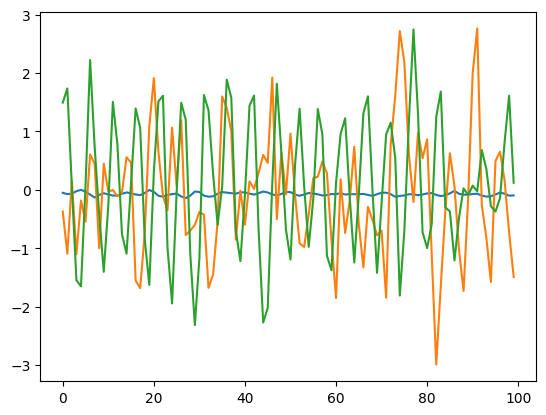

In [44]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

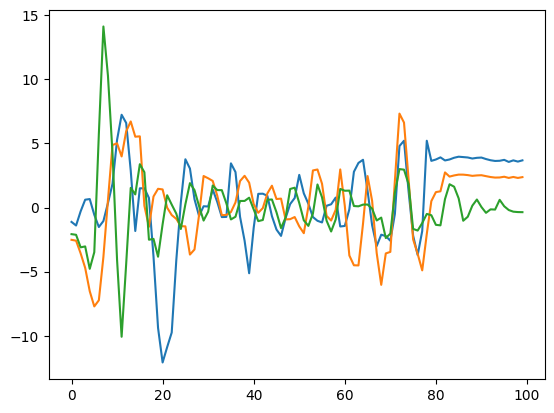

In [45]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])


In [46]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded
    
    def get_config(self):
        config = super(AutoEncoder, self).get_config()
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)
    

In [47]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [ ]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(val_data_scaled, val_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

# # Save the entire model to a file
# model.save("../../models/autoencoder_handlebar.h5")

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7653 - val_loss: 0.7611
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6844 - val_loss: 0.6119
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5601 - val_loss: 0.5969
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5570 - val_loss: 0.5968
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5481 - val_loss: 0.5967
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5556 - val_loss: 0.5966
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5568 - val_loss: 0.5962
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5599 - val_loss: 0.5955
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5457 - val_loss: 0.5951
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5587 - val_loss: 0.5948
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5508 - val_loss: 0.5945
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [34]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import custom_object_scope


# # Use custom_object_scope to load the model
# with custom_object_scope({'AutoEncoder': AutoEncoder}):
#     model = load_model("../../models/autoencoder_handlebar.h5")

# # Verify the model is loaded
# print(model.summary())

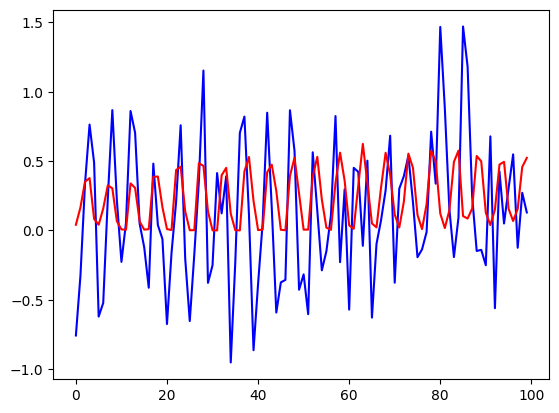

In [49]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

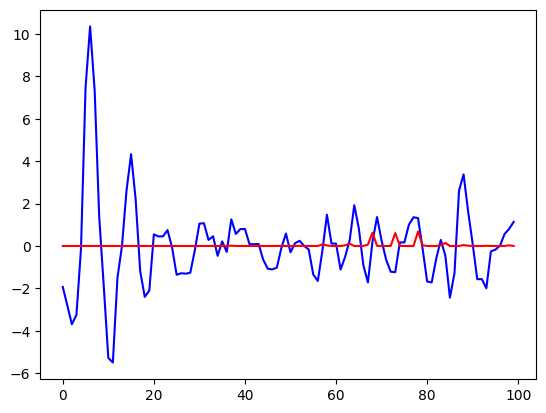

In [50]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([ 87., 171.,  14.,  10.,   4.,   0.,   2.,   1.,   1.,  11.,   8.,
         18.,  30.,  32.,  39.,  37.,  41.,  41.,  37.,  42.,  28.,  39.,
         32.,  24.,  22.,  16.,  15.,   8.,  20.,   3.,   9.,   9.,   4.,
          2.,   4.,   2.,   2.,   2.,   2.,   0.,   1.,   0.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.02510218, 0.0604166 , 0.09573102, 0.13104543, 0.16635986,
        0.20167427, 0.23698869, 0.2723031 , 0.30761755, 0.34293193,
        0.37824637, 0.41356081, 0.44887519, 0.48418963, 0.51950407,
        0.55481845, 0.59013289, 0.62544733, 0.66076171, 0.69607615,
        0.73139054, 0.76670498, 0.80201942, 0.8373338 , 0.87264824,
        0.90796268, 0.94327706, 0.9785915 , 1.01390588, 1.04922032,
        1.08453465, 1.11984909, 1.15516353, 1.19047797, 1.22579241,
        1.26110673, 1.29642117, 1.33173561, 1.36705005, 1.40236449,
        1.43767881, 1.47299325, 1.5083077 , 1.54362214, 1.57893658,
        1.61425102, 1.64956534, 1.68487978, 1.

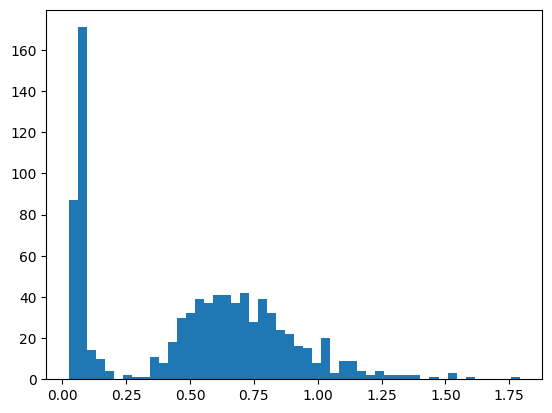

In [51]:
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.3354857 , 1.37277639, 1.41006708, 1.44735765, 1.48464835,
        1.52193904, 1.55922973, 1.59652042, 1.633811  , 1.67110169,
        1.70839238, 1.74568307, 1.78297377, 1.82026434, 1.85755515,
        1.89484572, 1.93213642, 1.96942711, 2.00671768, 2.04400849,
        2.08129907, 2.11858988, 2.15588045, 2.19317102, 2.23046184,
        2.26775241, 2.30504322, 2.34233379, 2.37962437, 2.41691518,
        2.45420575, 2.49149656, 2.52878714, 2.56607771, 2.60336852,
        2.64065909, 2.67794991, 2.71524048, 2.75253105, 2.78982186,
        2.82711244, 2.86440325, 2.90169382, 2.93898439, 2.97627521,
        3.01356602, 3.05085659, 3.08814716, 3.12543774, 3.16272855,
        3.20001912]),
 <BarContainer object of 50 artists>)

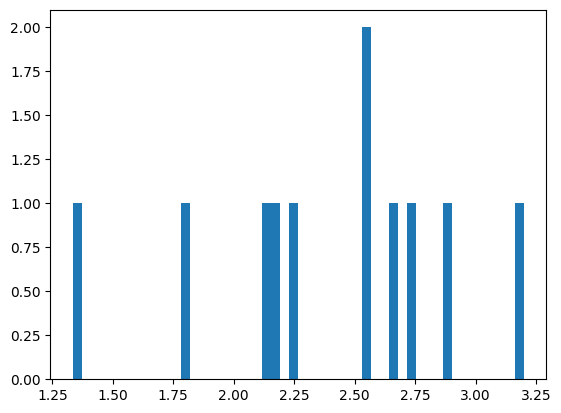

In [52]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

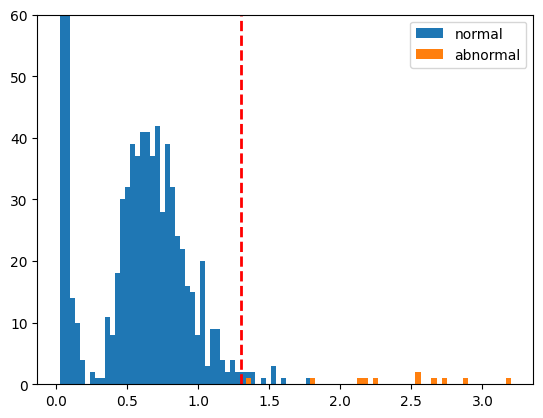

In [57]:
threshold = 1.30
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [58]:
preds=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  863
Accuracy:  0.9862857142857143


In [59]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  11
Accuracy:  1.0


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

# filepath: c:\Users\liuzi\Desktop\Code\Projekt\Bachelor_Project\notebooks\handlebar\confusion_matrix_example.py
# ...existing code...

# Suppose you have:
# test_labels: the true labels for test data (0 or 1)
# reconstruction_errors: reconstruction errors computed by the autoencoder for each sample
# threshold: a chosen value to separate normal (0) vs. abnormal (1)

# Predict on the test data
test_reconstruction = model.predict(test_data_scaled)

# Compute reconstruction error (e.g., mean squared error per sample)
reconstruction_errors = np.mean(
    np.abs(test_data_scaled - test_reconstruction), axis=1
)

# reconstruction_errors is now a 1D array (one error value per sample)
print("Reconstruction errors shape:", reconstruction_errors.shape)

y_pred = [1 if err > threshold else 0 for err in reconstruction_errors]

# Generate the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: classification report
print("\nClassification Report:\n", classification_report(test_labels, y_pred))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Reconstruction errors shape: (886,)
Confusion Matrix:
 [[863  12]
 [  0  11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       875
         1.0       0.48      1.00      0.65        11

    accuracy                           0.99       886
   macro avg       0.74      0.99      0.82       886
weighted avg       0.99      0.99      0.99       886



In [61]:
# 1. Combine the three DataFrames into one
combined_df = pd.concat([
    train_data_scaled_df,
    test_data_scaled_df,
    val_data_scaled_df
], ignore_index=True)

# 2. Convert 'start_time' to datetime if it's not already
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# 3. Sort by the 'start_time' column
combined_df.sort_values('start_time', inplace=True)

# 4. Set 'start_time' as the index
combined_df.set_index('start_time', inplace=True)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


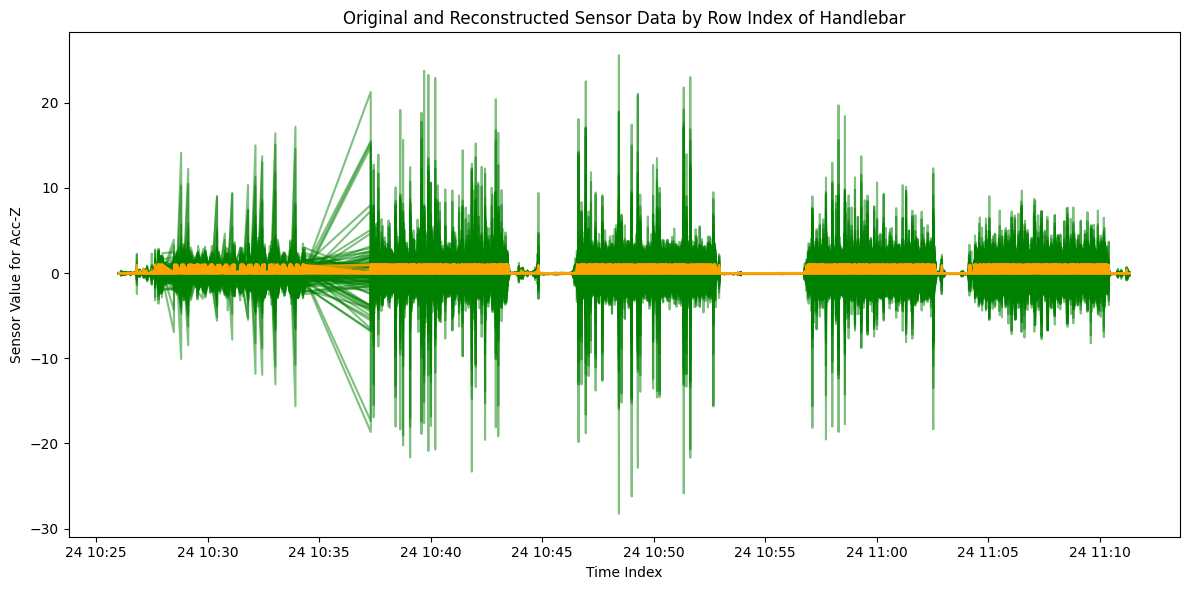

In [62]:
# reconstruct data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in combined_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = combined_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Use a single color for all lines
color_original = 'green'
color_reconstructed = 'orange'

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(combined_df.index, sensor_data[:, i], color=color_original, alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(combined_df.index, reconstructed_data[:, i], color=color_reconstructed, alpha=0.5)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()